# Project 3: Topology of time series



### Question

**1.**In the Project-3 folder, you will find two other folders: Normal and Wheezing. The first folder consists of recorded soumal” breathing. The second folder consists of recorded sound waves obreathing with a wheezing sound. This pattern of breathing is generally
detected in the breathing of asthmatic patients.


**2.**The Project-3 folder also contains the notebook Signal Processing.ipynb.Your main goal is to adapt this notebook to these new dataset.



**3.**You should create a labeling for the two folders, with files from Normallabeled 0 and files from Wheezing labeled 1. Create a training dataset (about 80% from each class) and testing data set (about 20% fromeach class.)


**4.**Follow the notebook closely and make your own choices of features selection. There are Persistent Entropy, Carlsson Coordinates and othermethods in the Notebook. Make your own choice (try different choicesof these features selection methods and choose the best).

**5.**Get the best accuracy as you can

---

In [ ]:
from ripser import ripser
from persim import plot_diagrams

In [ ]:
def fit_embedder(embedder, y, verbose=True):
    y_embedded = embedder.fit_transform(y)

    if verbose:
        print(f"Shape of embedded time series: {y_embedded.shape}")
        print(f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}")

    return y_embedded

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

/home/nnaa/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [16]:
import os
import shutil
from pathlib import Path
from sklearn.model_selection import train_test_split

# Define input directories
normal_dir = Path("/home/nnaa/Downloads/Normal")
asthma_dir = Path("/home/nnaa/Downloads/Asthma")

# Define output directories
train_dir = Path("/home/nnaa/Downloads/Train_Data")
test_dir = Path("/home/nnaa/Downloads/Test_Data")

# Create output directories if they don't exist
train_dir.mkdir(parents=True, exist_ok=True)
test_dir.mkdir(parents=True, exist_ok=True)

# List all .wav files in each input folder
normal_files = [file for file in normal_dir.iterdir() if file.suffix == ".wav"]
asthma_files = [file for file in asthma_dir.iterdir() if file.suffix == ".wav"]

# Split files into 80% training and 20% testing
normal_train, normal_test = train_test_split(normal_files, test_size=0.4, random_state=42)
asthma_train, asthma_test = train_test_split(asthma_files, test_size=0.4, random_state=42)


In [17]:

# Function to copy files with labels added to their names
def copy_files_with_labels(file_list, label, destination_folder, prefix):
    for file in file_list:
        # Add label to the file name
        new_name = f"{prefix}_{file.stem}_{label}{file.suffix}"
        new_path = destination_folder / new_name
        shutil.copy(file, new_path)  # Copy the file
        print(f"Copied {file.name} as {new_name} to {destination_folder}")



In [18]:
# Copy training files with labels
copy_files_with_labels(normal_train, label=0, destination_folder=train_dir, prefix="normal")
copy_files_with_labels(asthma_train, label=1, destination_folder=train_dir, prefix="asthma")

Copied DP99_N,N,P R M,50,M.wav as normal_DP99_N,N,P R M,50,M_0.wav to /home/nnaa/Downloads/Train_Data
Copied EP76_N,N,A L U,31,M.wav as normal_EP76_N,N,A L U,31,M_0.wav to /home/nnaa/Downloads/Train_Data
Copied DP103_N,N,P R U,81,F.wav as normal_DP103_N,N,P R U,81,F_0.wav to /home/nnaa/Downloads/Train_Data
Copied DP112_N,N,P L M,30,M.wav as normal_DP112_N,N,P L M,30,M_0.wav to /home/nnaa/Downloads/Train_Data
Copied EP50_N,N,P R L ,27,M.wav as normal_EP50_N,N,P R L ,27,M_0.wav to /home/nnaa/Downloads/Train_Data
Copied BP75_N,N,P L U,73,F.wav as normal_BP75_N,N,P L U,73,F_0.wav to /home/nnaa/Downloads/Train_Data
Copied DP72_N,N,P R U,24,F.wav as normal_DP72_N,N,P R U,24,F_0.wav to /home/nnaa/Downloads/Train_Data
Copied BP96_N,N,P R L ,66,F.wav as normal_BP96_N,N,P R L ,66,F_0.wav to /home/nnaa/Downloads/Train_Data
Copied DP76_N,N,A L U,31,M.wav as normal_DP76_N,N,A L U,31,M_0.wav to /home/nnaa/Downloads/Train_Data
Copied BP87_N,N,P R M,72,M.wav as normal_BP87_N,N,P R M,72,M_0.wav to /hom

Copied DP9_Asthma,E W,P R L ,59,M.wav as asthma_DP9_Asthma,E W,P R L ,59,M_1.wav to /home/nnaa/Downloads/Train_Data
Copied DP58_asthma,E W,P L M,40,M.wav as asthma_DP58_asthma,E W,P L M,40,M_1.wav to /home/nnaa/Downloads/Train_Data
Copied BP44_asthma,E W,P R U,40,M.wav as asthma_BP44_asthma,E W,P R U,40,M_1.wav to /home/nnaa/Downloads/Train_Data
Copied DP101_Asthma,E W,P L M,12,F.wav as asthma_DP101_Asthma,E W,P L M,12,F_1.wav to /home/nnaa/Downloads/Train_Data
Copied BP43_asthma,E W,P L M,15,M.wav as asthma_BP43_asthma,E W,P L M,15,M_1.wav to /home/nnaa/Downloads/Train_Data
Copied DP38_Asthma,E W,P R M,38,M.wav as asthma_DP38_Asthma,E W,P R M,38,M_1.wav to /home/nnaa/Downloads/Train_Data
Copied BP53_asthma,E W,P R M,72,F.wav as asthma_BP53_asthma,E W,P R M,72,F_1.wav to /home/nnaa/Downloads/Train_Data
Copied BP55_asthma,E W,P R U,72,F.wav as asthma_BP55_asthma,E W,P R U,72,F_1.wav to /home/nnaa/Downloads/Train_Data
Copied DP1_Asthma,I E W,P L L,70,M.wav as asthma_DP1_Asthma,I E W,P L 

In [19]:
# Copy testing files with labels
copy_files_with_labels(normal_test, label=0, destination_folder=test_dir, prefix="normal")
copy_files_with_labels(asthma_test, label=1, destination_folder=test_dir, prefix="asthma")

Copied BP50_N,N,P R L ,27,M.wav as normal_BP50_N,N,P R L ,27,M_0.wav to /home/nnaa/Downloads/Test_Data
Copied DP74_N,N,P R M,74,M.wav as normal_DP74_N,N,P R M,74,M_0.wav to /home/nnaa/Downloads/Test_Data
Copied EP99_N,N,P R M,50,M.wav as normal_EP99_N,N,P R M,50,M_0.wav to /home/nnaa/Downloads/Test_Data
Copied DP86_N,N,P R U,68,F.wav as normal_DP86_N,N,P R U,68,F_0.wav to /home/nnaa/Downloads/Test_Data
Copied EP95_N,N,P L M,18,M.wav as normal_EP95_N,N,P L M,18,M_0.wav to /home/nnaa/Downloads/Test_Data
Copied DP70_N,N,P L U,52,F.wav as normal_DP70_N,N,P L U,52,F_0.wav to /home/nnaa/Downloads/Test_Data
Copied DP84_N,N,A R U,65,F.wav as normal_DP84_N,N,A R U,65,F_0.wav to /home/nnaa/Downloads/Test_Data
Copied BP85_N,N,A R U,33,M.wav as normal_BP85_N,N,A R U,33,M_0.wav to /home/nnaa/Downloads/Test_Data
Copied EP72_N,N,P R U,24,F.wav as normal_EP72_N,N,P R U,24,F_0.wav to /home/nnaa/Downloads/Test_Data
Copied DP94_N,N,P L L,24,M.wav as normal_DP94_N,N,P L L,24,M_0.wav to /home/nnaa/Download

In [20]:
import os
import wave
import numpy as np

def process_audio_data(data_dir):
    """
    Processes audio data in a given directory, extracting signals and labels.
    Pads shorter signals with zeros to ensure uniform length.

    Args:
        data_dir (str): Path to the directory containing audio files.

    Returns:
        tuple: A tuple containing two NumPy arrays:
            - signals: Array of audio signals, padded to uniform length.
            - labels: Array of corresponding labels.
    """
    all_signals = []
    all_labels = []
    max_len = 0  # Variable to store the maximum signal length

    # First pass to determine the maximum signal length
    for filename in os.listdir(data_dir):
        if filename.endswith(".wav"):
            filepath = os.path.join(data_dir, filename)
            with wave.open(filepath, 'rb') as spf:
                signal = spf.readframes(-1)
                signal = np.frombuffer(signal, np.int16)
                max_len = max(max_len, len(signal))

    # Second pass to read and pad signals
    for filename in os.listdir(data_dir):
        if filename.endswith(".wav"):
            filepath = os.path.join(data_dir, filename)
            label = int(filename.split("_")[-1].split(".")[0])
            all_labels.append(label)
            with wave.open(filepath, 'rb') as spf:
                signal = spf.readframes(-1)
                signal = np.frombuffer(signal, np.int16)

                # Pad shorter signals with zeros
                if len(signal) < max_len:
                    signal = np.pad(signal, (0, max_len - len(signal)), 'constant')

                all_signals.append(signal)

    return np.array(all_signals), np.array(all_labels)



In [21]:
# Process train data
train_data_dir = "/home/nnaa/Downloads/Train_Data"
X_train, y_train = process_audio_data(train_data_dir)

print("Train data shape:", X_train.shape, y_train.shape)

Train data shape: (120, 120000) (120,)


In [22]:
# Process test data
test_data_dir = "/home/nnaa/Downloads/Test_Data"
X_test, y_test = process_audio_data(test_data_dir)

print("Test data shape:", X_test.shape, y_test.shape)

Test data shape: (81, 120000) (81,)


In [ ]:
#30, 30, 5

In [27]:
import os
import wave
import numpy as np
from gtda.time_series import SingleTakensEmbedding
from sklearn.decomposition import PCA

embedding_dimension = 30, 
embedding_time_delay = 300
stride = 10


def fit_embedder(embedder, signal, verbose=True):
    signal_embedded = embedder.fit_transform(signal)

    if verbose:
        print(f"Shape of embedded time series: {signal_embedded .shape}")
        print(f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}")

    return signal_embedded 

def apply_takens_embedding(signals, embedding_dimension=30, embedding_time_delay=300, stride=10):
    """
    Applies Takens embedding to a list of signals.

    Args:
        signals: A list or NumPy array of signals.
        embedding_dimension: The embedding dimension.
        embedding_time_delay: The time delay.
        stride: The stride.

    Returns:
        A list of embedded signals.
    """
    embedder = SingleTakensEmbedding(
        parameters_type="search",
        n_jobs=2,
        time_delay=embedding_time_delay,
        dimension=embedding_dimension,
        stride=stride
    )                                                                               

    embedded_signals = []
    for signal in signals:
        signal_embedded = fit_embedder(embedder, signal) # Set verbose=False to avoid excessive output
        embedded_signals.append(signal_embedded)

    return embedded_signals



In [28]:
# Process train data
#train_data_dir = "/content/Train_Data"
#X_train, y_train = process_audio_data(train_data_dir)

# Apply Takens embedding to the training data
X_train_embedded = apply_takens_embedding(X_train)


Shape of embedded time series: (11679, 20)
Optimal embedding dimension is 20 and time delay is 169
Shape of embedded time series: (11775, 10)
Optimal embedding dimension is 10 and time delay is 251
Shape of embedded time series: (11513, 29)
Optimal embedding dimension is 29 and time delay is 174
Shape of embedded time series: (11587, 22)
Optimal embedding dimension is 22 and time delay is 197
Shape of embedded time series: (11640, 14)
Optimal embedding dimension is 14 and time delay is 277
Shape of embedded time series: (11879, 15)
Optimal embedding dimension is 15 and time delay is 87
Shape of embedded time series: (11763, 11)
Optimal embedding dimension is 11 and time delay is 237
Shape of embedded time series: (11400, 27)
Optimal embedding dimension is 27 and time delay is 231
Shape of embedded time series: (11750, 11)
Optimal embedding dimension is 11 and time delay is 250
Shape of embedded time series: (11513, 24)
Optimal embedding dimension is 24 and time delay is 212
Shape of em

Shape of embedded time series: (11280, 25)
Optimal embedding dimension is 25 and time delay is 300
Shape of embedded time series: (11678, 13)
Optimal embedding dimension is 13 and time delay is 269
Shape of embedded time series: (11700, 19)
Optimal embedding dimension is 19 and time delay is 167
Shape of embedded time series: (11777, 9)
Optimal embedding dimension is 9 and time delay is 279
Shape of embedded time series: (11859, 15)
Optimal embedding dimension is 15 and time delay is 101
Shape of embedded time series: (11748, 14)
Optimal embedding dimension is 14 and time delay is 194
Shape of embedded time series: (11964, 8)
Optimal embedding dimension is 8 and time delay is 52
Shape of embedded time series: (11788, 10)
Optimal embedding dimension is 10 and time delay is 236
Shape of embedded time series: (11597, 19)
Optimal embedding dimension is 19 and time delay is 224
Shape of embedded time series: (11833, 11)
Optimal embedding dimension is 11 and time delay is 167
Shape of embedd

In [29]:
X_test_embedded = apply_takens_embedding(X_test)

Shape of embedded time series: (11871, 23)
Optimal embedding dimension is 23 and time delay is 59
Shape of embedded time series: (11790, 8)
Optimal embedding dimension is 8 and time delay is 300
Shape of embedded time series: (11492, 22)
Optimal embedding dimension is 22 and time delay is 242
Shape of embedded time series: (11912, 11)
Optimal embedding dimension is 11 and time delay is 88
Shape of embedded time series: (11778, 13)
Optimal embedding dimension is 13 and time delay is 185
Shape of embedded time series: (11400, 24)
Optimal embedding dimension is 24 and time delay is 261
Shape of embedded time series: (11807, 8)
Optimal embedding dimension is 8 and time delay is 277
Shape of embedded time series: (11609, 25)
Optimal embedding dimension is 25 and time delay is 163
Shape of embedded time series: (11550, 16)
Optimal embedding dimension is 16 and time delay is 300
Shape of embedded time series: (11909, 18)
Optimal embedding dimension is 18 and time delay is 54
Shape of embedded

In [30]:
from gtda.time_series import SingleTakensEmbedding
from ripser import ripser

# ... (Your existing fit_embedder and apply_takens_embedding_to_multiple_files functions) ...

# After you have X_train_embedded:
X_train_dgms = []
for signal_embedded in X_train_embedded:
    res = ripser(signal_embedded, n_perm=700)
    dgms_sub = res['dgms']
    X_train_dgms.append(dgms_sub)

In [32]:
from gtda.time_series import SingleTakensEmbedding
from ripser import ripser

# ... (Your existing fit_embedder and apply_takens_embedding_to_multiple_files functions) ...

# After you have X_train_embedded:
X_test_dgms = []
for signal_embedded in X_test_embedded:
    res = ripser(signal_embedded, n_perm=700)
    dgms_sub = res['dgms']
    X_test_dgms.append(dgms_sub)

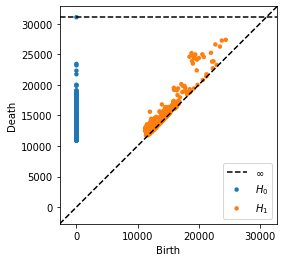

In [34]:
from persim import plot_diagrams

plot_diagrams(X_train_dgms[0], show=True)

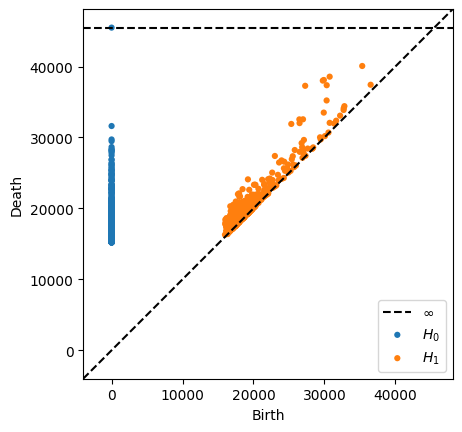

In [36]:
from persim import plot_diagrams

plot_diagrams(X_test_dgms[0], show=True)

In [35]:
for i, dgms_sub in enumerate(X_train_dgms[:5]):  # Slice the list to get first 5 diagrams
    print(f"Signal {i + 1}:")
    print(f"  Shape: {dgms_sub[1].shape}") 

Signal 1:
  Shape: (1235, 2)
Signal 2:
  Shape: (1334, 2)
Signal 3:
  Shape: (1552, 2)
Signal 4:
  Shape: (694, 2)
Signal 5:
  Shape: (1255, 2)


In [37]:
for i, dgms_sub in enumerate(X_test_dgms[:5]):  # Slice the list to get first 5 diagrams
    print(f"Signal {i + 1}:")
    print(f"  Shape: {dgms_sub[1].shape}") 

Signal 1:
  Shape: (846, 2)
Signal 2:
  Shape: (1039, 2)
Signal 3:
  Shape: (735, 2)
Signal 4:
  Shape: (1135, 2)
Signal 5:
  Shape: (749, 2)


In [38]:
def convert_dgm(dgm):
    Arr = dgm.copy()
    Arr[0] = Arr[0][:-1]
    col_a  = np.zeros(Arr[0].shape[0])
    Arr[0] = np.column_stack((Arr[0], col_a))

    col_b  = np.ones(Arr[1].shape[0], dtype=int)
    Arr[1] = np.column_stack((Arr[1], col_b))
    temp_1 = list(Arr[0])
    temp_2 = list(Arr[1])
    temp_1.extend(temp_2)
    return np.asarray(temp_1)

In [39]:
X_train_dgms_converted = [convert_dgm(dgms_sub) for dgms_sub in X_train_dgms]

In [41]:
X_test_dgms_converted = [convert_dgm(dgms_sub) for dgms_sub in X_test_dgms]

In [40]:
res_list = []  # List to store the 'res' for each diagram

for i, dgms_sub in enumerate(X_train_dgms):
    res = convert_dgm(dgms_sub)  # Assign output of convert_dgm to 'res'
    res_list.append(res)         # Store 'res' in the list
    print(f"Signal {i + 1}:")
    print(f"  Shape of res: {res.shape}")

Signal 1:
  Shape of res: (1934, 3)
Signal 2:
  Shape of res: (2033, 3)
Signal 3:
  Shape of res: (2251, 3)
Signal 4:
  Shape of res: (1393, 3)
Signal 5:
  Shape of res: (1954, 3)
Signal 6:
  Shape of res: (1578, 3)
Signal 7:
  Shape of res: (1846, 3)
Signal 8:
  Shape of res: (2047, 3)
Signal 9:
  Shape of res: (1883, 3)
Signal 10:
  Shape of res: (1254, 3)
Signal 11:
  Shape of res: (1133, 3)
Signal 12:
  Shape of res: (2156, 3)
Signal 13:
  Shape of res: (2081, 3)
Signal 14:
  Shape of res: (1582, 3)
Signal 15:
  Shape of res: (2405, 3)
Signal 16:
  Shape of res: (2076, 3)
Signal 17:
  Shape of res: (2109, 3)
Signal 18:
  Shape of res: (2003, 3)
Signal 19:
  Shape of res: (2050, 3)
Signal 20:
  Shape of res: (1721, 3)
Signal 21:
  Shape of res: (2024, 3)
Signal 22:
  Shape of res: (1296, 3)
Signal 23:
  Shape of res: (2226, 3)
Signal 24:
  Shape of res: (2037, 3)
Signal 25:
  Shape of res: (1995, 3)
Signal 26:
  Shape of res: (1876, 3)
Signal 27:
  Shape of res: (2074, 3)
Signal 28:

In [42]:
res1_list = []  # List to store the 'res' for each diagram

for i, dgms_sub in enumerate(X_test_dgms):
    res = convert_dgm(dgms_sub)  # Assign output of convert_dgm to 'res'
    res1_list.append(res)         # Store 'res' in the list
    print(f"Signal {i + 1}:")
    print(f"  Shape of res: {res.shape}")

Signal 1:
  Shape of res: (1545, 3)
Signal 2:
  Shape of res: (1738, 3)
Signal 3:
  Shape of res: (1434, 3)
Signal 4:
  Shape of res: (1834, 3)
Signal 5:
  Shape of res: (1448, 3)
Signal 6:
  Shape of res: (2745, 3)
Signal 7:
  Shape of res: (1839, 3)
Signal 8:
  Shape of res: (2058, 3)
Signal 9:
  Shape of res: (2168, 3)
Signal 10:
  Shape of res: (2000, 3)
Signal 11:
  Shape of res: (1769, 3)
Signal 12:
  Shape of res: (1759, 3)
Signal 13:
  Shape of res: (1477, 3)
Signal 14:
  Shape of res: (1807, 3)
Signal 15:
  Shape of res: (1349, 3)
Signal 16:
  Shape of res: (1934, 3)
Signal 17:
  Shape of res: (1879, 3)
Signal 18:
  Shape of res: (1634, 3)
Signal 19:
  Shape of res: (2040, 3)
Signal 20:
  Shape of res: (1671, 3)
Signal 21:
  Shape of res: (1769, 3)
Signal 22:
  Shape of res: (1995, 3)
Signal 23:
  Shape of res: (2315, 3)
Signal 24:
  Shape of res: (1637, 3)
Signal 25:
  Shape of res: (2514, 3)
Signal 26:
  Shape of res: (2157, 3)
Signal 27:
  Shape of res: (1067, 3)
Signal 28:

In [43]:
res_list = []

for i, dgms_sub in enumerate(X_train_dgms):
    res = convert_dgm(dgms_sub)
    res_list.append(res[None,:,:])  # Add new dimension here
    print(f"Signal {i + 1}:")
    print(f"  Shape of res[None,:,:]: {res[None,:,:].shape}")

Signal 1:
  Shape of res[None,:,:]: (1, 1934, 3)
Signal 2:
  Shape of res[None,:,:]: (1, 2033, 3)
Signal 3:
  Shape of res[None,:,:]: (1, 2251, 3)
Signal 4:
  Shape of res[None,:,:]: (1, 1393, 3)
Signal 5:
  Shape of res[None,:,:]: (1, 1954, 3)
Signal 6:
  Shape of res[None,:,:]: (1, 1578, 3)
Signal 7:
  Shape of res[None,:,:]: (1, 1846, 3)
Signal 8:
  Shape of res[None,:,:]: (1, 2047, 3)
Signal 9:
  Shape of res[None,:,:]: (1, 1883, 3)
Signal 10:
  Shape of res[None,:,:]: (1, 1254, 3)
Signal 11:
  Shape of res[None,:,:]: (1, 1133, 3)
Signal 12:
  Shape of res[None,:,:]: (1, 2156, 3)
Signal 13:
  Shape of res[None,:,:]: (1, 2081, 3)
Signal 14:
  Shape of res[None,:,:]: (1, 1582, 3)
Signal 15:
  Shape of res[None,:,:]: (1, 2405, 3)
Signal 16:
  Shape of res[None,:,:]: (1, 2076, 3)
Signal 17:
  Shape of res[None,:,:]: (1, 2109, 3)
Signal 18:
  Shape of res[None,:,:]: (1, 2003, 3)
Signal 19:
  Shape of res[None,:,:]: (1, 2050, 3)
Signal 20:
  Shape of res[None,:,:]: (1, 1721, 3)
Signal 21

In [51]:
res1_list = []

for i, dgms_sub in enumerate(X_test_dgms):
    res1 = convert_dgm(dgms_sub)
    res1_list.append(res1[None,:,:]) 
    print(f"Signal {i + 1}:")
    print(f"  Shape of res1[None,:,:]: {res1[None,:,:].shape}")

Signal 1:
  Shape of res1[None,:,:]: (1, 1545, 3)
Signal 2:
  Shape of res1[None,:,:]: (1, 1738, 3)
Signal 3:
  Shape of res1[None,:,:]: (1, 1434, 3)
Signal 4:
  Shape of res1[None,:,:]: (1, 1834, 3)
Signal 5:
  Shape of res1[None,:,:]: (1, 1448, 3)
Signal 6:
  Shape of res1[None,:,:]: (1, 2745, 3)
Signal 7:
  Shape of res1[None,:,:]: (1, 1839, 3)
Signal 8:
  Shape of res1[None,:,:]: (1, 2058, 3)
Signal 9:
  Shape of res1[None,:,:]: (1, 2168, 3)
Signal 10:
  Shape of res1[None,:,:]: (1, 2000, 3)
Signal 11:
  Shape of res1[None,:,:]: (1, 1769, 3)
Signal 12:
  Shape of res1[None,:,:]: (1, 1759, 3)
Signal 13:
  Shape of res1[None,:,:]: (1, 1477, 3)
Signal 14:
  Shape of res1[None,:,:]: (1, 1807, 3)
Signal 15:
  Shape of res1[None,:,:]: (1, 1349, 3)
Signal 16:
  Shape of res1[None,:,:]: (1, 1934, 3)
Signal 17:
  Shape of res1[None,:,:]: (1, 1879, 3)
Signal 18:
  Shape of res1[None,:,:]: (1, 1634, 3)
Signal 19:
  Shape of res1[None,:,:]: (1, 2040, 3)
Signal 20:
  Shape of res1[None,:,:]: (1

## Generating topological features for classification

## Persistent Entropy

In [ ]:
from gtda.diagrams import PersistenceEntropy

persistence_entropy = PersistenceEntropy()

# calculate topological feature matrix
X_pe = persistence_entropy.fit_transform(res[None,:,:])

# expect shape - (n_point_clouds, n_homology_dims)
X_pe.shape

(1, 2)

In [45]:
from gtda.diagrams import PersistenceEntropy

persistence_entropy = PersistenceEntropy()

X_pe_list = []  # List to store topological feature matrices for each file

for i, dgms_sub in enumerate(X_train_dgms):
    res = convert_dgm(dgms_sub)
    X_pe = persistence_entropy.fit_transform(res[None, :, :])  # Calculate for current file
    X_pe_list.append(X_pe)  # Store in the list
    print(f"Signal {i + 1}:")
    print(f"  Shape of X_pe: {X_pe.shape}")

Signal 1:
  Shape of X_pe: (1, 2)
Signal 2:
  Shape of X_pe: (1, 2)
Signal 3:
  Shape of X_pe: (1, 2)
Signal 4:
  Shape of X_pe: (1, 2)
Signal 5:
  Shape of X_pe: (1, 2)
Signal 6:
  Shape of X_pe: (1, 2)
Signal 7:
  Shape of X_pe: (1, 2)
Signal 8:
  Shape of X_pe: (1, 2)
Signal 9:
  Shape of X_pe: (1, 2)
Signal 10:
  Shape of X_pe: (1, 2)
Signal 11:
  Shape of X_pe: (1, 2)
Signal 12:
  Shape of X_pe: (1, 2)
Signal 13:
  Shape of X_pe: (1, 2)
Signal 14:
  Shape of X_pe: (1, 2)
Signal 15:
  Shape of X_pe: (1, 2)
Signal 16:
  Shape of X_pe: (1, 2)
Signal 17:
  Shape of X_pe: (1, 2)
Signal 18:
  Shape of X_pe: (1, 2)
Signal 19:
  Shape of X_pe: (1, 2)
Signal 20:
  Shape of X_pe: (1, 2)
Signal 21:
  Shape of X_pe: (1, 2)
Signal 22:
  Shape of X_pe: (1, 2)
Signal 23:
  Shape of X_pe: (1, 2)
Signal 24:
  Shape of X_pe: (1, 2)
Signal 25:
  Shape of X_pe: (1, 2)
Signal 26:
  Shape of X_pe: (1, 2)
Signal 27:
  Shape of X_pe: (1, 2)
Signal 28:
  Shape of X_pe: (1, 2)
Signal 29:
  Shape of X_pe: (

In [52]:
from gtda.diagrams import PersistenceEntropy

persistence_entropy = PersistenceEntropy()

X_pe_list1 = []  # List to store topological feature matrices for each file

for i, dgms_sub in enumerate(X_test_dgms):
    res1 = convert_dgm(dgms_sub)
    X_pe1 = persistence_entropy.fit_transform(res1[None, :, :])  # Calculate for current file
    X_pe_list1.append(X_pe1)  # Store in the list
    print(f"Signal {i + 1}:")
    print(f"  Shape of X_pe: {X_pe1.shape}")

Signal 1:
  Shape of X_pe: (1, 2)
Signal 2:
  Shape of X_pe: (1, 2)
Signal 3:
  Shape of X_pe: (1, 2)
Signal 4:
  Shape of X_pe: (1, 2)
Signal 5:
  Shape of X_pe: (1, 2)
Signal 6:
  Shape of X_pe: (1, 2)
Signal 7:
  Shape of X_pe: (1, 2)
Signal 8:
  Shape of X_pe: (1, 2)
Signal 9:
  Shape of X_pe: (1, 2)
Signal 10:
  Shape of X_pe: (1, 2)
Signal 11:
  Shape of X_pe: (1, 2)
Signal 12:
  Shape of X_pe: (1, 2)
Signal 13:
  Shape of X_pe: (1, 2)
Signal 14:
  Shape of X_pe: (1, 2)
Signal 15:
  Shape of X_pe: (1, 2)
Signal 16:
  Shape of X_pe: (1, 2)
Signal 17:
  Shape of X_pe: (1, 2)
Signal 18:
  Shape of X_pe: (1, 2)
Signal 19:
  Shape of X_pe: (1, 2)
Signal 20:
  Shape of X_pe: (1, 2)
Signal 21:
  Shape of X_pe: (1, 2)
Signal 22:
  Shape of X_pe: (1, 2)
Signal 23:
  Shape of X_pe: (1, 2)
Signal 24:
  Shape of X_pe: (1, 2)
Signal 25:
  Shape of X_pe: (1, 2)
Signal 26:
  Shape of X_pe: (1, 2)
Signal 27:
  Shape of X_pe: (1, 2)
Signal 28:
  Shape of X_pe: (1, 2)
Signal 29:
  Shape of X_pe: (

In [49]:

X_pe_all = np.vstack(X_pe_list) 
X_pe_all


array([[ 9.43174065,  9.74186743],
       [ 9.44458524,  9.96315313],
       [ 9.44357649, 10.15839236],
       [ 9.34011916,  7.55097004],
       [ 9.36215947,  9.83204033],
       [ 9.42064336,  9.09857752],
       [ 9.43500165,  9.75818254],
       [ 9.43139158,  9.85824773],
       [ 9.43825566,  9.8046345 ],
       [ 9.41473434,  8.0349727 ],
       [ 9.43171386,  8.09841573],
       [ 9.4441757 , 10.05901505],
       [ 9.44316409, 10.03524306],
       [ 9.42447718,  9.22531285],
       [ 9.44443748, 10.35307959],
       [ 9.44458107,  9.99047158],
       [ 9.44420788, 10.03986358],
       [ 9.4343159 ,  9.89422542],
       [ 9.43981332,  9.97370146],
       [ 9.43381829,  9.58022159],
       [ 9.44040953,  9.95147586],
       [ 9.41106028,  8.35252406],
       [ 9.44378908, 10.16586893],
       [ 9.44283545,  9.92104053],
       [ 9.44357769,  9.91358441],
       [ 9.43972493,  9.75396539],
       [ 9.43731928,  9.89529526],
       [ 9.43196411,  9.66609046],
       [ 9.44643523,

In [53]:
X_pe_all_1 = np.vstack(X_pe_list1) 
X_pe_all_1

array([[ 9.43494025,  9.16601048],
       [ 9.44197921,  9.62852739],
       [ 9.39156608,  8.17280643],
       [ 9.4441194 ,  9.73875853],
       [ 9.41865745,  8.92283219],
       [ 9.44767209, 10.60722635],
       [ 9.44088345,  9.75845044],
       [ 9.44112664,  9.98815558],
       [ 9.44261187, 10.12730881],
       [ 9.44132024,  9.91058384],
       [ 9.43890678,  9.61247282],
       [ 9.43030684,  9.57551373],
       [ 9.40312323,  8.67678428],
       [ 9.43974526,  9.67047029],
       [ 9.35976478,  8.63435122],
       [ 9.43174065,  9.74186743],
       [ 9.4433185 ,  9.80715723],
       [ 9.41348651,  9.1526912 ],
       [ 9.44360805,  9.98915266],
       [ 9.43641878,  9.38709044],
       [ 9.42943027,  9.63999296],
       [ 9.43801317,  9.90925903],
       [ 9.44080102, 10.24700111],
       [ 9.43854553,  9.38771026],
       [ 9.44226042, 10.41474511],
       [ 9.4431451 , 10.087971  ],
       [ 9.42997113,  7.46999833],
       [ 9.44305993, 10.00138097],
       [ 9.41384484,

## Features from different metrics

In [63]:
from sklearn.pipeline import Pipeline
from gtda.diagrams import Amplitude
from gtda.diagrams import NumberOfPoints
from gtda.diagrams import PersistenceEntropy

In [64]:
from sklearn.pipeline import make_pipeline, make_union

In [65]:
# Listing all metrics we want to use to extract diagram amplitudes
metrics = [
    {"metric": "bottleneck", "metric_params": {}},
    {"metric": "wasserstein", "metric_params": {"p": 2}},
    {"metric": "betti", "metric_params": {"p": 2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 3.2, "n_bins": 100}},
]

In [67]:
feature_union = make_union(
    PersistenceEntropy(normalize=True),
    NumberOfPoints(n_jobs=-1),
    *[Amplitude(**metric, n_jobs=-1) for metric in metrics]
)

In [72]:
single_data = feature_union.fit_transform(res[None,:,:])
single_data.shape

(1, 14)

In [73]:
single_data1 = feature_union.fit_transform(res1[None,:,:])
single_data1.shape

(1, 14)

In [ ]:
X_metrics = single_data
X_metrics

array([[4.23000675e-01, 4.56000914e-01, 6.99000000e+02, 8.70000000e+02,
        6.72570215e+03, 6.02315381e+03, 9.69969482e+04, 2.08392459e+04,
        5.57279010e+04, 9.26906147e+03, 1.74876041e+00, 9.27810058e-01,
        1.74876041e+00, 9.27810058e-01]])

In [75]:
X_metrics1 = single_data1
X_metrics1

array([[4.10478555e-01, 5.11833975e-01, 6.99000000e+02, 1.50100000e+03,
        1.24137266e+04, 3.31678320e+03, 1.55982931e+05, 1.42146686e+04,
        7.15032055e+04, 1.68394914e+04, 1.39233603e+00, 1.73905428e+00,
        1.39233603e+00, 1.73905428e+00]])

## Concatenate all features obtained

In [114]:
single_X_train_test = np.concatenate((X_metrics,X_metrics1 ), axis=None)

In [115]:
single_X_train_test

array([4.10478555e-01, 5.11833975e-01, 6.99000000e+02, 1.50100000e+03,
       1.24137266e+04, 3.31678320e+03, 1.55982931e+05, 1.42146686e+04,
       7.15032055e+04, 1.68394914e+04, 1.39233603e+00, 1.73905428e+00,
       1.39233603e+00, 1.73905428e+00, 4.10478555e-01, 5.11833975e-01,
       6.99000000e+02, 1.50100000e+03, 1.24137266e+04, 3.31678320e+03,
       1.55982931e+05, 1.42146686e+04, 7.15032055e+04, 1.68394914e+04,
       1.39233603e+00, 1.73905428e+00, 1.39233603e+00, 1.73905428e+00])

In [117]:
single_X_train_test

array([4.10478555e-01, 5.11833975e-01, 6.99000000e+02, 1.50100000e+03,
       1.24137266e+04, 3.31678320e+03, 1.55982931e+05, 1.42146686e+04,
       7.15032055e+04, 1.68394914e+04, 1.39233603e+00, 1.73905428e+00,
       1.39233603e+00, 1.73905428e+00, 4.10478555e-01, 5.11833975e-01,
       6.99000000e+02, 1.50100000e+03, 1.24137266e+04, 3.31678320e+03,
       1.55982931e+05, 1.42146686e+04, 7.15032055e+04, 1.68394914e+04,
       1.39233603e+00, 1.73905428e+00, 1.39233603e+00, 1.73905428e+00])

# checking the accuracy

In [ ]:
nn.fit(x=training_set_s, y=training_labels,validation_data=(testing_set_s,testing_labels),epochs=10, shuffle = True, batch_size=128)

In [132]:
!pip install librosa

     |████████████████████████████████| 260 kB 402 kB/s eta 0:00:01
     |████████████████████████████████| 377 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 253 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 445 kB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 117 kB 11.2 MB/s eta 0:00:01


In [ ]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pathlib import Path

# Define input directories
normal_dir = Path("/home/nnaa/Downloads/Normal")
asthma_dir = Path("/home/nnaa/Downloads/Asthma")

# Function to extract features from audio
def extract_features_from_audio(file_path):
    # Load the audio file
    signal, sr = librosa.load(file_path, sr=None)  
    # You can extract any features, like MFCC, Spectrogram, etc.
    return signal


X_normal = []
y_normal = []
for file in normal_dir.iterdir():
    if file.suffix == ".wav":
        signal = extract_features_from_audio(file)
        X_normal.append(signal)
        y_normal.append(0)  # 0 for normal


X_asthma = []
y_asthma = []
for file in asthma_dir.iterdir():
    if file.suffix == ".wav":
        signal = extract_features_from_audio(file)
        X_asthma.append(signal)
        y_asthma.append(1) 


X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normal, y_normal, test_size=0.4, random_state=42)
X_train_asthma, X_test_asthma, y_train_asthma, y_test_asthma = train_test_split(X_asthma, y_asthma, test_size=0.4, random_state=42)

# Combine training data and labels
X_train_combined = X_train_normal + X_train_asthma
y_train_combined = y_train_normal + y_train_asthma

# Combine test data and labels
X_test_combined = X_test_normal + X_test_asthma
y_test_combined = y_test_normal + y_test_asthma



In [ ]:
# Function to extract MFCC features
def extract_features(audio_data, sample_rate=22050):
    return [np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13).T, axis=0) for audio in audio_data]

# Extract features from the training and test data
X_train_features = extract_features(X_train_combined)
X_test_features = extract_features(X_test_combined)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the combined training data
model.fit(X_train_features, y_train_combined)

# Predict on the combined test data
y_pred = model.predict(X_test_features)

# Evaluate the model performance
accuracy = accuracy_score(y_test_combined, y_pred)
print(f"Model Accuracy: {accuracy}")

In [ ]:
# Extract Persistent Entropy features
X_train_persistent_entropy = persistent_entropy(X_train_combined)
X_test_persistent_entropy = persistent_entropy(X_test_combined)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_persistent_entropy.reshape(-1, 1), y_train_combined)

# Predict on the test data
y_pred = model.predict(X_test_persistent_entropy.reshape(-1, 1))

# Calculate accuracy
accuracy = accuracy_score(y_test_combined, y_pred)
print(f"Accuracy using Persistent Entropy: {accuracy}")

In [ ]:
import numpy as np
import librosa
import gudhi
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pathlib import Path

# Function to extract Carlsson Coordinates
def carlsson_coordinates(audio_data):
    carlsson_coords = []

    for audio in audio_data:
        # Convert audio to a point cloud (same as for Persistent Entropy)
        mfcc = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=13).T
        point_cloud = mfcc[:, :2]  # Using first two MFCCs as 2D points

        # Create a SimplexTree from the point cloud
        st = gudhi.SimplexTree()
        for i, point in enumerate(point_cloud):
            st.insert([i], filtration=0)

        # Compute the persistent diagram
        persistence = st.persistence()

        # Extract Carlsson Coordinates from the persistent diagram
        coordinates = [p[1][1] - p[1][0] for p in persistence if p[1][1] > p[1][0]]

        # If no coordinates, add a zero (or customize this)
        # Instead of appending a list, append a NumPy array with shape (1,)
        # This ensures all elements in carlsson_coords have the same number of dimensions
        carlsson_coords.append(np.array(coordinates if coordinates else [0]))

    # Pad sequences to have the same length
    max_len = max(len(arr) for arr in carlsson_coords)
    padded_coords = [np.pad(arr, (0, max_len - len(arr)), 'constant') for arr in carlsson_coords]

    # Replace infinite values with a large finite value
    padded_coords = np.nan_to_num(padded_coords, posinf=np.finfo(np.float32).max, neginf=np.finfo(np.float32).min)

    return np.array(padded_coords)


In [ ]:
# Extract Carlsson Coordinates features
X_train_carlsson_coords = carlsson_coordinates(X_train_combined)
X_test_carlsson_coords = carlsson_coordinates(X_test_combined)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_carlsson_coords, y_train_combined)

# Predict on the test data
y_pred = model.predict(X_test_carlsson_coords)

# Calculate accuracy
accuracy = accuracy_score(y_test_combined, y_pred)
print(f"Accuracy using Carlsson Coordinates: {accuracy}")